In [52]:
import pandas as pd
import numpy as np
import json
import os


import matplotlib.pyplot as plt

In [ ]:
log_path = r'logs\TL_EffN0_256_05_11_2020_22_10'
k = 3

In [ ]:
logs333 = {}
for i in range(k):
    with open(f"{log_path}/{i}.json") as f:
        logs333[i] = json.load(f)
with open(f"{log_path}/config.json") as f:
    config_file = json.load(f)

In [ ]:
logs3=[]
logs33=[]

In [ ]:
def get_mean(logs, stat="val_auc"):
    result = np.array([sum(x) for x in zip(logs[0][stat],logs[1][stat],logs[2][stat],logs[3][stat],logs[4][stat])])/5
    return result

def get_mean3(logs, stat="val_auc"):
    result = np.array([sum(x) for x in zip(logs[0][stat],logs[1][stat],logs[2][stat])])/3
    return result

In [ ]:
stat = "auc"

In [ ]:
val_recall = get_mean3(logs333,"val_"+stat)
recall = get_mean3(logs333,stat)
plt.plot(val_recall,'r')
plt.plot(recall)
print(np.max(val_recall))

In [ ]:
val_recall = get_mean3(logs3,"val_"+stat)
recall = get_mean3(logs3,stat)
plt.plot(val_recall,'r')
plt.plot(recall)
print(np.max(val_recall))

In [ ]:
val_recall = get_mean3(logs33,"val_"+stat)
recall = get_mean3(logs33,stat)
plt.plot(val_recall,'r')
plt.plot(recall)
print(np.max(val_recall))

In [ ]:
logs = []
log_path = r'logs\TL_EffN0_256_04_11_2020_16_21'
k = 5

In [3]:
log_path = r'logs\LR_7_EffN0_256_07_11_2020_22_33'


In [4]:
file_name = os.path.join(log_path,'logs.pyc')
logs = pd.read_pickle(file_name)


NameError: name 'os' is not defined

In [55]:
logs.columns

Index(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall',
       'auc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn',
       'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'lr'],
      dtype='object')

In [56]:
for x in logs:
    logs[x] = logs[x].apply(lambda y: np.array(y))

In [57]:
means2 = dict()
for x,y in logs.sum().items():
    means2[x] = y/len(logs)

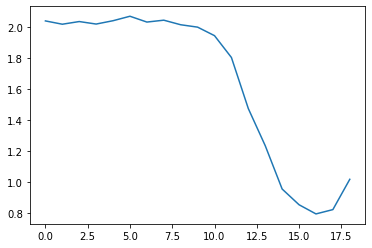

In [71]:
plt.plot(means['loss'][:-3])

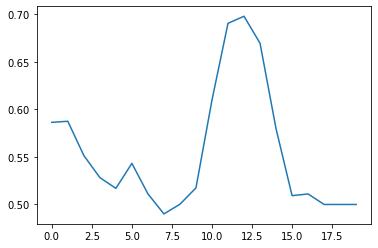

In [69]:
plt.plot(means2['val_auc'][:-2])

In [ ]:
for x in range(100):
    print(f"{x}:\t{1*0.9**x}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,100)
y = np.array([1*0.9**r for r in x])
plt.plot(x,y)

ModuleNotFoundError: No module named 'CLR'